<a href="https://colab.research.google.com/github/sira-code/DS-ML-PY-projects-/blob/master/TWEETS_SENTIMENT_ANALYSIS_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [103]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [104]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [105]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [106]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [107]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [108]:
train[train['label']==0].head(15)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [109]:
train[train['label']==1].head(15)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [110]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

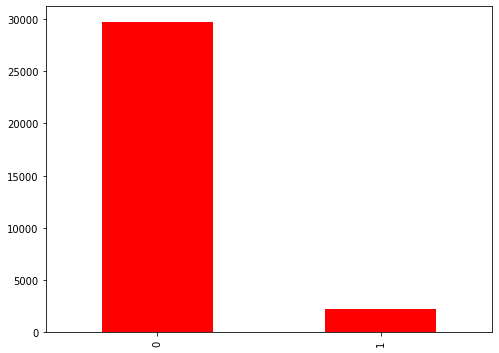

In [111]:
train['label'].value_counts().plot.bar(color='red',figsize=(8,6))

Text(0.5, 1.0, 'DISTRIBUTION OF TWEETS IN THE DATA')

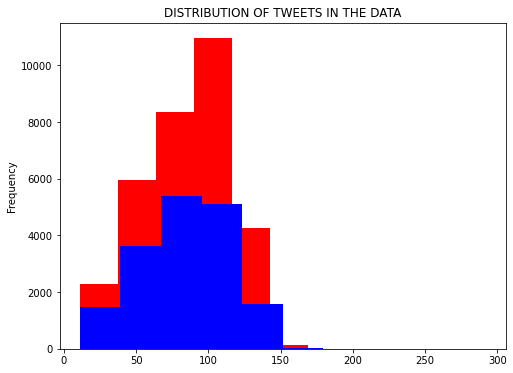

In [112]:
leng_train= train['tweet'].str.len().plot.hist(color='red',figsize=(8,6))
leng_test= test['tweet'].str.len().plot.hist(color='blue',figsize=(8,6))
plt.title('DISTRIBUTION OF TWEETS IN THE DATA')

In [113]:
train['len']=train['tweet'].str.len()
test['len']=test['tweet'].str.len()

In [114]:
train.head(8)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143


In [115]:
test.head(8)

,id,tweet,len
0,31963,#studiolife #aislife #requires #passion #dedic...,90
1,31964,@user #white #supremacists want everyone to s...,101
2,31965,safe ways to heal your #acne!! #altwaystohe...,71
3,31966,is the hp and the cursed child book up for res...,142
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",93
5,31968,choose to be :) #momtips,27
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,92
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,85


In [116]:
train.describe()

,id,label,len
count,31962.000000,31962.000000,31962.000000
mean,15981.500000,0.070146,84.739628
std,9226.778988,0.255397,29.455749
min,1.000000,0.000000,11.000000
25%,7991.250000,0.000000,63.000000
50%,15981.500000,0.000000,88.000000
75%,23971.750000,0.000000,108.000000
max,31962.000000,1.000000,274.000000


In [117]:
train.groupby('label').describe()

id                                   ...   len                    
         count          mean          std   min  ...   25%   50%    75%    max
label                                            ...                          
0      29720.0  15974.454441  9223.783469   1.0  ...  62.0  88.0  107.0  274.0
1       2242.0  16074.896075  9267.955758  14.0  ...  69.0  96.0  111.0  152.0

[2 rows x 16 columns]

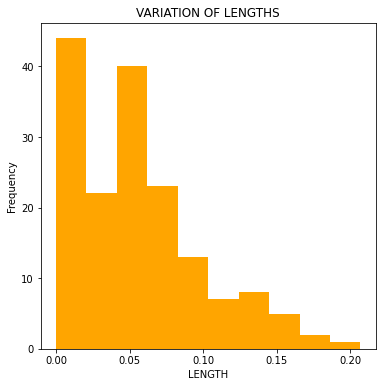

In [118]:
train.groupby('len').mean()['label'].plot.hist(color='orange',figsize=(6,6))
plt.title('VARIATION OF LENGTHS')
plt.xlabel('LENGTH')
plt.show()

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

In [120]:
cv= CountVectorizer(stop_words='english')

In [121]:
words = cv.fit_transform(train.tweet)

In [122]:
sum_words= words. sum(axis =0)

In [123]:
words_freq=[(word,sum_words[0,i]) for word ,i in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key= lambda x:x[1],reverse = True)

Text(0.5, 1.0, 'TOP 30 MOST FREQUENTLY OCCURING WORDS')

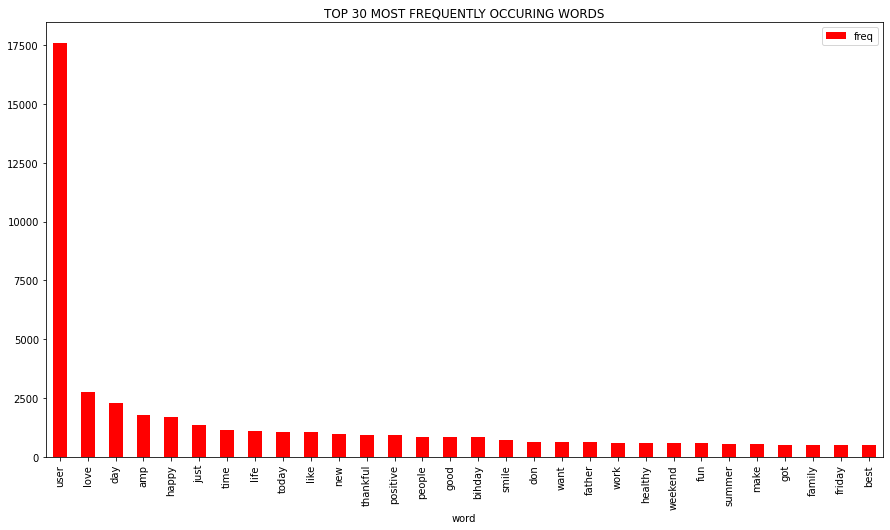

In [124]:
frequ=pd.DataFrame(words_freq,columns=['word','freq'])
frequ.head(30).plot(x='word',y='freq',kind = 'bar',figsize=(15,8),color='red')
plt.title('TOP 30 MOST FREQUENTLY OCCURING WORDS')

In [125]:
from wordcloud import WordCloud

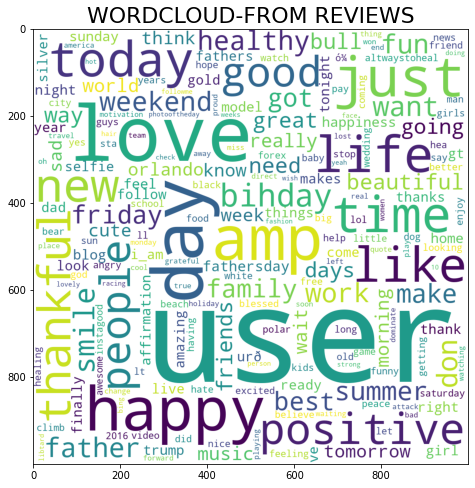

In [126]:
wordcloud = WordCloud(background_color='white',width=1000,height=1000).generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(10,8))
plt.title('WORDCLOUD-FROM REVIEWS',fontsize=22)
plt.imshow(wordcloud)

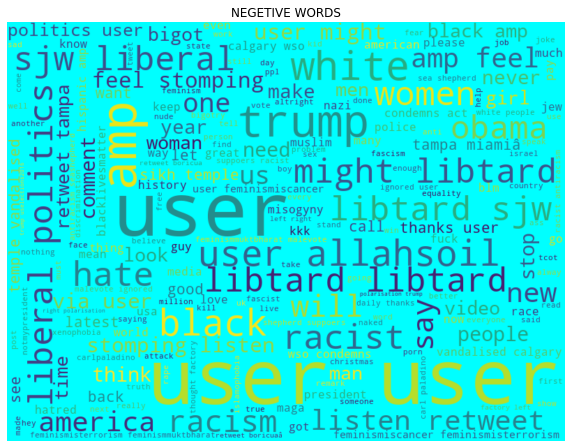

In [127]:
neg_words=' '.join([text for text in train['tweet'][train['label']==1]])
wordcloud= WordCloud(random_state=0, background_color='cyan',width=800,height= 600,max_font_size=110).generate(neg_words)
plt.figure(figsize=(10,8))
plt.title('NEGETIVE WORDS')
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

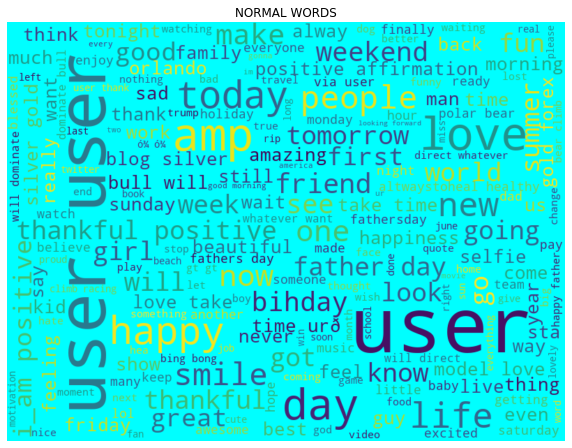

In [128]:
norm_words=' '.join([text for text in train['tweet'][train['label']==0]])
wordcloud= WordCloud(random_state=0, background_color='cyan',width=800,height= 600,max_font_size=110).generate(norm_words)
plt.figure(figsize=(10,8))
plt.title('NORMAL WORDS')
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [129]:
import re
def hashtag_extract(x):
    hashtags = []
    for i in x:
      ht = re.findall(r"#(\w+)", i)
      hashtags.append(ht)
    return hashtags

In [130]:
HT_reg = hashtag_extract(train['tweet'][train['label']==0])
HT_neg = hashtag_extract(train['tweet'][train['label']==1])
HT_reg= sum(HT_reg,[])
HT_neg= sum(HT_neg,[])

In [131]:
import nltk

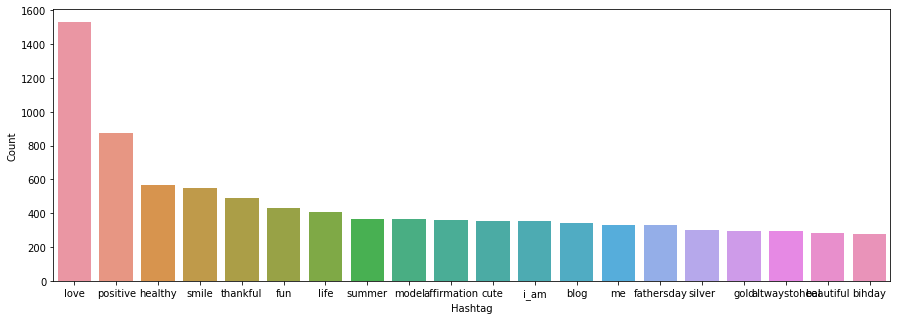

In [132]:
a = nltk.FreqDist(HT_reg)
dt=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
dt = dt.nlargest(columns='Count',n=20)
plt.figure(figsize=(15,5))
ax=sns.barplot(data=dt,x="Hashtag",y="Count")
ax.set(ylabel ='Count')
plt.show()

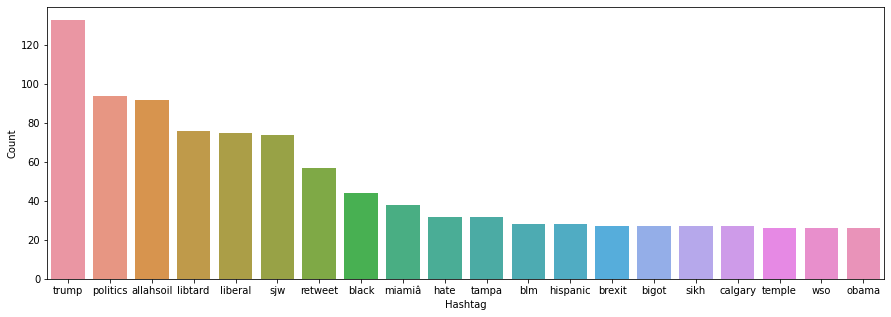

In [133]:
a = nltk.FreqDist(HT_neg)
dt=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
dt = dt.nlargest(columns='Count',n=20)
plt.figure(figsize=(15,5))
ax=sns.barplot(data=dt,x="Hashtag",y="Count")
ax.set(ylabel ='Count')
plt.show()

In [134]:
tokenized_tweet=train['tweet'].apply(lambda x:x.split())

In [135]:
import gensim

In [136]:
model_w2=gensim.models.Word2Vec(tokenized_tweet,size = 200,window=5,min_count=2,sg=1,hs=0,negative=10,workers=2,seed=34)

In [137]:
model_w2.train(tokenized_tweet,total_examples= len(train['tweet']),epochs=20)

(6110310, 8411580)

In [138]:
model_w2.wv.most_similar(positive="dinner")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('spaghetti', 0.6315280199050903),
 ('#prosecco', 0.6134028434753418),
 ('#wanderlust', 0.6120968461036682),
 ('podium', 0.6051501035690308),
 ('later!', 0.5996172428131104),
 ('sister!!', 0.5913108587265015),
 ('#iftar', 0.5887667536735535),
 ('shopping!', 0.5884213447570801),
 ('ð\x9f\x98\x8að\x9f\x98\x8d', 0.5869479179382324),
 ('coaching', 0.5834459066390991)]

In [139]:
model_w2.wv.most_similar(positive="cancer")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ownership', 0.7526847124099731),
 ('champion,', 0.7317601442337036),
 ('level.', 0.7306113243103027),
 ('devoted', 0.7263379096984863),
 ('rights,', 0.7255669832229614),
 ('law.', 0.7244940400123596),
 ('lacking', 0.7239059209823608),
 ('ways.', 0.7206111550331116),
 ('blames', 0.7180393934249878),
 ("society's", 0.7177127599716187)]

In [140]:
model_w2.wv.most_similar(positive="apple")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('"mytraining"', 0.7135872840881348),
 ('mytraining', 0.7066635489463806),
 ('training"', 0.6944347620010376),
 ('app,', 0.6705523133277893),
 ('"my', 0.6119875907897949),
 ('app', 0.608900785446167),
 ('humans.', 0.5987186431884766),
 ("domino's", 0.5800092220306396),
 ('ta', 0.5757211446762085),
 ('#appleta', 0.5725399851799011)]

In [141]:
model_w2.wv.most_similar(positive="hate")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('gosh..', 0.551705002784729),
 ('kill.', 0.5285143256187439),
 ('losers.', 0.5276917219161987),
 ('hatred.', 0.5263994932174683),
 ('#prayfororlandoâ\x80¦', 0.526016354560852),
 ('stupidity', 0.520714282989502),
 ('much?', 0.5207074880599976),
 ('champion,', 0.516211211681366),
 ('intolerance.', 0.5158805847167969),
 ('assassinating', 0.5118376016616821)]

In [142]:
from tqdm import tqdm

In [143]:
tqdm.pandas(desc="progess-bar")
from gensim.models.doc2vec import LabeledSentence

In [144]:
def add_label(twt):
  op = []
  for i,s in zip(twt.index,twt):
    op.append(LabeledSentence(s,["tweet_" +str(i)]))
    return op

In [145]:
labeled_tweets=add_label(tokenized_tweet)
labeled_tweets[:6]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


[LabeledSentence(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0'])]

In [146]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [147]:
train_corpus=[]
for i in range(0,31962):
  review =re.sub('[^a-zA-z]','',train['tweet'][i])
  review = review.lower()
  review = review.split()

  ps= PorterStemmer()
  review = [ps.stem(word)for word in review if not word in set (stopwords.words('english'))]

  review = ''.join(review)
  train_corpus.append(review)

In [148]:
test_corpus=[]
for i in range(0,17197):
  review =re.sub('[^a-zA-z]','',train['tweet'][i])
  review = review.lower()
  review = review.split()

  ps= PorterStemmer()
  review = [ps.stem(word)for word in review if not word in set (stopwords.words('english'))]

  review = ''.join(review)
  test_corpus.append(review)

In [149]:
from sklearn.feature_extraction.text import CountVectorizer

In [150]:
cv= CountVectorizer(max_features=2500)

In [151]:
x=cv.fit_transform(train_corpus).toarray()

In [152]:
y = train.iloc[:, 1]

In [153]:
#x = x.reshape(x.shape[1:])
print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [154]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=2500)

In [155]:
x_test=cv.fit_transform(test_corpus).toarray()
print(x_test.shape)

(17197, 2500)


In [156]:
from sklearn.model_selection import train_test_split

In [157]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.25,random_state=42)

In [158]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [167]:
from sklearn.preprocessing import StandardScaler

In [168]:
sc = StandardScaler()

In [169]:
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)
x_test = sc.fit_transform(x_test)

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [171]:
rc= RandomForestClassifier()

In [172]:
rc.fit(x_train,y_train)
y_pred= rc.predict(x_valid)

In [173]:
print("TRAINING ACCURACY ",rc.score(x_train,y_train))
print("VALIDATION ACCURACY ",rc.score(x_valid,y_valid))
print("FI SCORE ",f1_score(y_valid,y_pred))

TRAINING ACCURACY  0.9458095198364691
VALIDATION ACCURACY  0.9384307345763985
FI SCORE  0.21405750798722042


In [174]:
cm = confusion_matrix(y_valid,y_pred)
print(cm)

[[7432    0]
 [ 492   67]]


In [175]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [176]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [177]:
y_pred= lr.predict(x_valid)

In [178]:
print("TRAINING ACCURACY ",lr.score(x_train,y_train))
print("VALIDATION ACCURACY ",lr.score(x_valid,y_valid))
print("FI SCORE ",f1_score(y_valid,y_pred))

TRAINING ACCURACY  0.9458095198364691
VALIDATION ACCURACY  0.9389312977099237
FI SCORE  0.22539682539682537


In [179]:
cm = confusion_matrix(y_valid,y_pred)
print(cm)

[[7432    0]
 [ 488   71]]


In [180]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()

In [181]:
dc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [182]:
y_pred= dc.predict(x_valid)

In [183]:
print("TRAINING ACCURACY ",dc.score(x_train,y_train))
print("VALIDATION ACCURACY ",dc.score(x_valid,y_valid))
print("FI SCORE ",f1_score(y_valid,y_pred))

TRAINING ACCURACY  0.9458095198364691
VALIDATION ACCURACY  0.9384307345763985
FI SCORE  0.21405750798722042


In [184]:
cm = confusion_matrix(y_valid,y_pred)
print(cm)

[[7432    0]
 [ 492   67]]


In [185]:
from sklearn.svm import SVC
sv= SVC()

In [186]:
sv.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [187]:
y_pred= sv.predict(x_valid)

In [188]:
print("TRAINING ACCURACY ",sv.score(x_train,y_train))
print("VALIDATION ACCURACY ",sv.score(x_valid,y_valid))
print("FI SCORE ",f1_score(y_valid,y_pred))

TRAINING ACCURACY  0.9458095198364691
VALIDATION ACCURACY  0.9360530596921537
FI SCORE  0.1581548599670511


In [189]:
cm = confusion_matrix(y_valid,y_pred)
print(cm)

[[7432    0]
 [ 511   48]]


In [190]:
from xgboost import XGBClassifier
xb= XGBClassifier()

In [191]:
xb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [192]:
y_pred= xb.predict(x_valid)

In [194]:
print("TRAINING ACCURACY ",xb.score(x_train,y_train))
print("VALIDATION ACCURACY ",xb.score(x_valid,y_valid))
print("FI SCORE ",f1_score(y_valid,y_pred))

TRAINING ACCURACY  0.9347127779400108
VALIDATION ACCURACY  0.9341759479414341
FI SCORE  0.11148648648648647


In [193]:
cm = confusion_matrix(y_valid,y_pred)
print(cm)

[[7432    0]
 [ 526   33]]
